In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
import scipy.stats as stats

In [2]:
# create coherence for 10 averages
N = 100
data1 = np.random.randn(16384 * N)
data2 = np.random.randn(16384 * N)
srate = 16384
First=1
for ii in range(N):
    data1fft = np.fft.rfft(data1[srate*ii:srate*(ii+1)])
    data2fft = np.fft.rfft(data2[srate*ii:srate*(ii+1)])
    if First:
        csd = np.conj(data1fft) * data2fft
        psd1 = np.conj(data1fft) * data1fft
        psd2 = np.conj(data2fft) * data2fft
        First = 0
    else:
        csd = (csd * ii + np.conj(data1fft) * data2fft) / (ii + 1)
        psd1 = (psd1 * ii + np.conj(data1fft) * data1fft) / (ii + 1)
        psd2 = (psd2 * ii + np.conj(data2fft) * data2fft) / (ii + 1)

freqs = np.fft.rfftfreq(16384, d=1./16384)
coh = np.abs(csd)**2 / (psd1 * psd2)

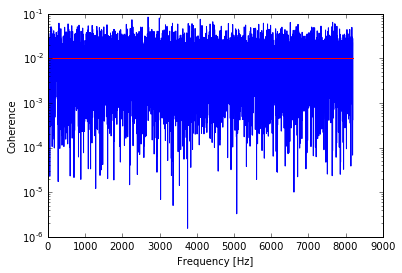

In [3]:
# plot coherence ones just to check it has expected behavior
plot = plt.figure()
plt.plot(freqs, np.abs(coh))
plt.plot([freqs[0], freqs[-1]], [1./N, 1./N],'r')
ax = plt.gca()
ax.set_ylabel('Coherence')
ax.set_xlabel('Frequency [Hz]')
ax.set_yscale('log')
plt.show()

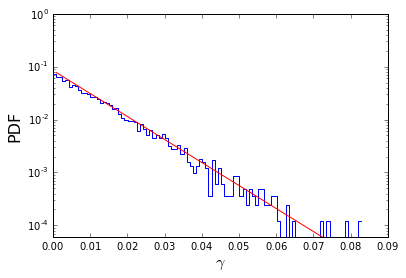

In [4]:
# plot histogram of coherence and make sure it acts as expected (exponential distribution)
coh = np.abs(coh)
vals, binedges = np.histogram(coh, bins=100)
vals = vals / np.float(np.sum(vals))
# this normalization with alpha doesn't work...
alpha = N / (1 - np.exp(-N))
plot = plt.figure()
plt.step(binedges[:-1], vals)
plt.plot(binedges[1:], np.max(vals) * np.exp(-N * binedges[1:]),'r')
ax = plt.gca()
ax.set_yscale("log")
ax.set_xlabel('$\gamma$',fontsize=16)
ax.set_ylabel('PDF',fontsize=16)
ax.set_ylim(5e-1 * 1./len(freqs), 1)
plt.show()


In [5]:
# now let's start summing up some combs (or, for now, just summing up random indices of the same length...)
# since this is gaussian data, it doesn't really matter if we accidentally add the same one twice...I don't think...
# Let's do it...1000 times
sums = []
n = 10
for jj in range(10000):
    idxs = np.random.randint(low=0, high=8193, size=n)
    sums.append(np.sum(coh[idxs]))

    


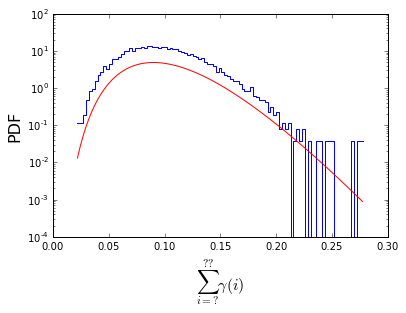

In [6]:
[vals2, binedges2] = np.histogram(sums, bins=100)
vals2 = vals2 / np.float(np.sum(vals2))
b = binedges2[:-1] # for ease in making theoretical distribution
bw = binedges2[1] - binedges2[0]
logdist = n * np.log(N) + (n-1) * np.log(b) - N*b - ss.gammaln(n) - ss.gammainc(n,n*N)
dist = np.exp(logdist)
plot = plt.figure()
plt.step(binedges2[:-1], vals2/bw)
plt.plot(b,dist,'r')
ax = plt.gca()
ax.set_yscale("log")
ax.set_xlabel('$\sum_{i=?}^{??}\gamma(i)$',fontsize=16)
ax.set_ylabel('PDF',fontsize=16)
#ax.set_ylim(5e-1 * 1./len(freqs), 1)
plt.show()